# Quantum Transport: Atom to Transistor by Supriyo Datta 

***

# Table of Contents

9. <font size="3.5">[Coherent transport](#ninth-chapter)<br></font>
    9.4. [Transmission](#9.4)<br>
    9.5. [Examples](#9.5)<br>

[_References_](#references)<br>

***

# 9. Coherent transport <a id="ninth-chapter"></a>

## <font color = "navy" >9.4 Transmission </font> <a id="9.4"></a>

<font color = "olive"> <u> 
- Previous variables are killed and a fresh start is conducted.</u> </font>

In [1]:
%reset -f
%matplotlib inline
from pylab import *

In [2]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; m=9.110e-31; q=1.602e-19; a=5e-10; L=10e-9;
k=0.5*linspace(-1,1,201)/a;
Ek=(hbar**2)*(k**2)/(2*0.25*m*q);
EE=linspace(0,0.2,201);

#Subband (1,1)
E1=2*(hbar**2)*(pi**2)/(2*0.25*m*q*L**2);
M=((EE-E1)+abs(EE-E1))/(2*abs(EE-E1));

#Subbands (1,2) and (2,1)
E2=5*(hbar**2)*(pi**2)/(2*0.25*m*q*L**2);
M=M+(((EE-E2)+abs(EE-E2))/(abs(EE-E2)));

#Subband (2,2)
E3=8*(hbar**2)*(pi**2)/(2*0.25*m*q*L**2);
M=M+(((EE-E3)+abs(EE-E3))/(2*abs(EE-E3)));
k=k*1e-9;

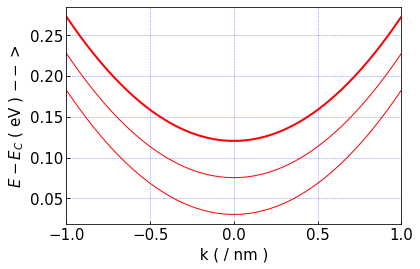

In [3]:
plot(k,E1+Ek,'r',lw=1)
plot(k,E2+Ek,'r',lw=1)
plot(k,E3+Ek,'r',lw=2)
xlabel(' k ( / nm ) ',fontsize=15)
ylabel('$\ E - E_C$ ( eV ) $-->$ ',fontsize=15)
xlim(-1,1)
tick_params(axis='both',which='major',labelsize=15,direction='in')
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 9.4.2__ In the transmission formalism, the channel is assumed to be connected to the contacts by two uniform leads that can be viewed as quantum wires with multiple subbands having well-defined $E–k$ relationships as shown. This allows us to define an $S$-matrix for the device analogous to a microwave waveguide. </font>

***

## <font color = "navy" >9.5 Examples </font> <a id="9.5"></a>

In [8]:
%reset -f
%matplotlib inline
from pylab import *
import cmath

#Constants (all MKS, except energy which is in eV)
hbar=1.06e-34; q=1.6e-19; m=0.25*9.1e-31; IE=(q*q)/(2*pi*hbar);
Ef=0.1; kT=0.025;

#inputs
a=3e-10; t0=(hbar**2)/(2*m*(a**2)*q);

In [9]:
#Hamiltonian matrix
NS=15; NC=20; ND=15; Np=NS+NC+ND; UB=0*ones((Np)); #no barrier
T=(2*t0*diag(ones((Np))))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1));
T=T+diagflat(UB);

#Bias
V=0; mu1=Ef+(V/2); mu2=Ef-(V/2);
U1=V*hstack((0.5*ones((NS)),linspace(0.5,-0.5,NC),-0.5*ones((ND))));
U1=transpose(U1); #Applied potential profile

#Energy grid for Green’s function method
NE=501; E=linspace(-0.2,0.8,NE); zplus=1j*1e-12; dE=E[1]-E[0];
f1=1/(1+exp((E-mu1)/kT));
f2=1/(1+exp((E-mu2)/kT));

#Initializing arrays
TM=zeros((NE));

#Transmission
I=0; #Current

for k in range (0,NE):
    sig1=zeros((Np,Np),dtype=complex); sig2=zeros((Np,Np),dtype=complex); sig3=zeros((Np,Np),dtype=complex);
    ck=1-((E[k]+zplus-U1[0]-UB[0])/(2*t0)); ka=cmath.acos(ck);
    sig1[0,0]=-t0*exp(1j*ka); gam1=1j*(sig1-conj(transpose(sig1)));
    ck=1-((E[k]+zplus-U1[Np-1]-UB[Np-1])/(2*t0)); ka=cmath.acos(ck);
    sig2[Np-1,Np-1]=-t0*exp(1j*ka); gam2=1j*(sig2-conj(transpose(sig2)));
    G=inv(((E[k]+zplus)*eye(Np))-T-diag(U1)-sig1-sig2-sig3);
    TM[k]=real(trace(dot(dot(dot(gam1,G),gam2),conj(transpose(G)))));
    I=I+(dE*IE*TM[k]*(f1[k]-f2[k]));

XX=a*1e9*(array(list(range(1,Np+1)))); 
XS=XX[0:NS-4]; 
XD=XX[NS+NC+5-1:Np];

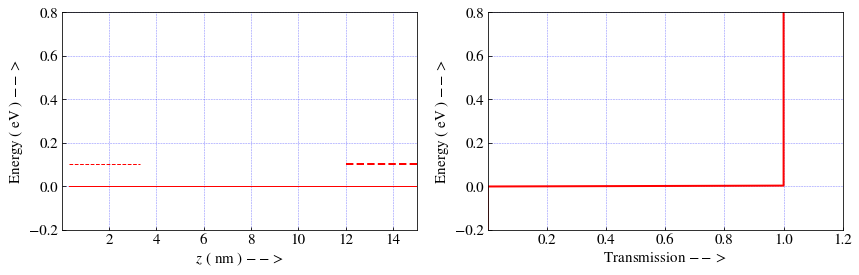

In [175]:
figure(figsize=(14,4))
subplot(1,2,1)
plot(XX,U1+UB,'r',lw=1)
plot(XS,mu1*ones((NS-4)),'r--',lw=1)
plot(XD,mu2*ones((ND-4)),'r--',lw=2)
xlabel(' $z$ ( nm ) $-->$ ',fontsize=15)
ylabel(' Energy ( eV ) $-->$ ',fontsize=15)
xlim(0,15); 
ylim(-0.2,0.8)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(2,16,2))
grid(color='b', alpha=0.5, ls='--',lw=0.5)

subplot(1,2,2)
plot(TM,E,'r',lw=2)
xlabel(' Transmission $-->$ ',fontsize=15)
ylabel(' Energy ( eV ) $-->$ ',fontsize=15)
xlim(0,1.2)
ylim(-0.2,0.8)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.2,1.4,0.2))
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > (a) Ballistic device </font>

In [176]:
#Hamiltonian matrix
NS=23; NC=4; ND=23; Np=NS+NC+ND;
UB=vstack((zeros((NS,1)),0.4*ones((NC,1)),zeros((ND,1)))); #tunneling barrier
T=(2*t0*diag(ones((Np))))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1));
T=T+diagflat(UB);

#Bias
V=0; mu1=Ef+(V/2); mu2=Ef-(V/2);
U1=V*hstack((0.5*ones((NS)),linspace(0.5,-0.5,NC),-0.5*ones((ND))));
U1=transpose(U1); #Applied potential profile

#Energy grid for Green’s function method
NE=501; E=linspace(-0.2,0.8,NE); zplus=1j*1e-12; dE=E[1]-E[0];
f1=1/(1+exp((E-mu1)/kT));
f2=1/(1+exp((E-mu2)/kT));

#Initializing arrays
TM=zeros((NE));

#Transmission
I=0; #Current

for k in range (0,NE):
    sig1=zeros((Np,Np),dtype=complex); sig2=zeros((Np,Np),dtype=complex); sig3=zeros((Np,Np),dtype=complex);
    ck=1-((E[k]+zplus-U1[0]-UB[0])/(2*t0)); ka=cmath.acos(ck);
    sig1[0,0]=-t0*exp(1j*ka); gam1=1j*(sig1-conj(transpose(sig1)));
    ck=1-((E[k]+zplus-U1[Np-1]-UB[Np-1])/(2*t0)); ka=cmath.acos(ck);
    sig2[Np-1,Np-1]=-t0*exp(1j*ka); gam2=1j*(sig2-conj(transpose(sig2)));
    G=inv(((E[k]+zplus)*eye(Np))-T-diag(U1)-sig1-sig2-sig3);
    TM[k]=real(trace(dot(dot(dot(gam1,G),gam2),conj(transpose(G)))));
    I=I+(dE*IE*TM[k]*(f1[k]-f2[k]));

XX=a*1e9*(array(list(range(1,Np+1)))); 
XS=XX[0:NS-4]; 
XD=XX[NS+NC+5-1:Np];

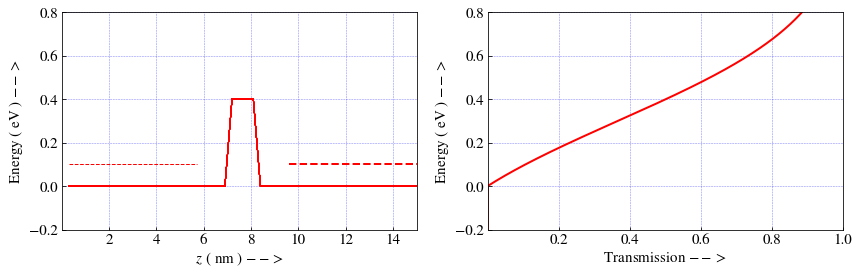

In [177]:
figure(figsize=(14,4))
subplot(1,2,1)
plot(XX,U1+UB,'r',lw=1)
plot(XS,mu1*ones((NS-4)),'r--',lw=1)
plot(XD,mu2*ones((ND-4)),'r--',lw=2)
xlabel(' $z$ ( nm ) $-->$ ',fontsize=15)
ylabel(' Energy ( eV ) $-->$ ',fontsize=15)
xlim(0,15); 
ylim(-0.2,0.8)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(2,16,2))
grid(color='b', alpha=0.5, ls='--',lw=0.5)

subplot(1,2,2)
plot(TM,E,'r',lw=2)
xlabel(' Transmission $-->$ ',fontsize=15)
ylabel(' Energy ( eV ) $-->$ ',fontsize=15)
xlim(0,1)
ylim(-0.2,0.8)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.2,1.2,0.2))
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > (b) Tunneling device </font>

In [178]:
#Hamiltonian matrix
NS=15; NC=16; ND=15; Np=NS+NC+ND;
UB=vstack((zeros((NS,1)),0.4*ones((4,1)),zeros((NC-8,1)),0.4*ones((4,1)),zeros((ND,1)))); #RT barrier
T=(2*t0*diag(ones((Np))))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1));
T=T+diagflat(UB);

#Bias
V=0; mu1=Ef+(V/2); mu2=Ef-(V/2);
U1=V*hstack((0.5*ones((NS)),linspace(0.5,-0.5,NC),-0.5*ones((ND))));
U1=transpose(U1); #Applied potential profile

#Energy grid for Green’s function method
NE=501; E=linspace(-0.2,0.8,NE); zplus=1j*1e-12; dE=E[1]-E[0];
f1=1/(1+exp((E-mu1)/kT));
f2=1/(1+exp((E-mu2)/kT));

#Initializing arrays
TM=zeros((NE));

#Transmission
I=0; #Current

for k in range (0,NE):
    sig1=zeros((Np,Np),dtype=complex); sig2=zeros((Np,Np),dtype=complex); sig3=zeros((Np,Np),dtype=complex);
    ck=1-((E[k]+zplus-U1[0]-UB[0])/(2*t0)); ka=cmath.acos(ck);
    sig1[0,0]=-t0*exp(1j*ka); gam1=1j*(sig1-conj(transpose(sig1)));
    ck=1-((E[k]+zplus-U1[Np-1]-UB[Np-1])/(2*t0)); ka=cmath.acos(ck);
    sig2[Np-1,Np-1]=-t0*exp(1j*ka); gam2=1j*(sig2-conj(transpose(sig2)));
    G=inv(((E[k]+zplus)*eye(Np))-T-diag(U1)-sig1-sig2-sig3);
    TM[k]=real(trace(dot(dot(dot(gam1,G),gam2),conj(transpose(G)))));
    I=I+(dE*IE*TM[k]*(f1[k]-f2[k]));

XX=a*1e9*(array(list(range(1,Np+1)))); 
XS=XX[0:NS-4]; 
XD=XX[NS+NC+5-1:Np];

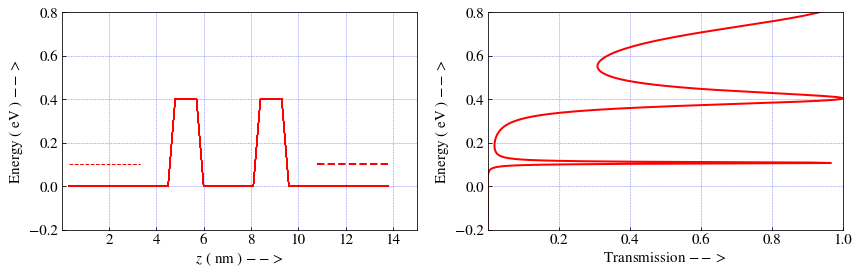

In [179]:
figure(figsize=(14,4))
subplot(1,2,1)
plot(XX,U1+UB,'r',lw=1)
plot(XS,mu1*ones((NS-4)),'r--',lw=1)
plot(XD,mu2*ones((ND-4)),'r--',lw=2)
xlabel(' $z$ ( nm ) $-->$ ',fontsize=15)
ylabel(' Energy ( eV ) $-->$ ',fontsize=15)
xlim(0,15); 
ylim(-0.2,0.8)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(2,16,2))
grid(color='b', alpha=0.5, ls='--',lw=0.5)

subplot(1,2,2)
plot(TM,E,'r',lw=2)
xlabel(' Transmission $-->$ ',fontsize=15)
ylabel(' Energy ( eV ) $-->$ ',fontsize=15)
xlim(0,1)
ylim(-0.2,0.8)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.2,1.2,0.2))
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > (c) Resonant tunneling device </font>

<font color = "stone"><font size = "4" > __Fig. 9.5.5__ Equilibrium band diagram and transmission function for each of the devices in Fig. 9.5.4. </font>

***

In [180]:
%reset -f
%matplotlib inline
from pylab import *
import cmath

In [181]:
#Constants (all MKS, except energy which is in eV)
hbar=1.06e-34; q=1.6e-19; m=0.25*9.1e-31; IE=(q*q)/(2*pi*hbar);
Ef=0.1; kT=0.025;

#inputs
a=3e-10; t0=(hbar**2)/(2*m*(a**2)*q);
NS=15; NC=30; ND=15; Np=NS+NC+ND;

#Hamiltonian matrix
NS=15; NC=16; ND=15; Np=NS+NC+ND;
UB=vstack((zeros((NS,1)),0.4*ones((4,1)),zeros((NC-8,1)),0.4*ones((4,1)),zeros((ND,1)))); #RT barrier
T=(2*t0*diag(ones((Np))))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1));
T=T+diagflat(UB);

#Bias
V=0; mu1=Ef+(V/2); mu2=Ef-(V/2);
U1=V*hstack((0.5*ones((NS)),linspace(0.5,-0.5,NC),-0.5*ones((ND))));
U1=transpose(U1); #Applied potential profile

#Energy grid for Green’s function method
NE=501; E=linspace(-0.2,0.8,NE); zplus=1j*1e-12; dE=E[1]-E[0];
f1=1/(1+exp((E-mu1)/kT));
f2=1/(1+exp((E-mu2)/kT));

#Initializing arrays
TM=zeros((NE));

#Transmission
I=0; #Current

for k in range (0,NE):
    sig1=zeros((Np,Np),dtype=complex); sig2=zeros((Np,Np),dtype=complex); sig3=zeros((Np,Np),dtype=complex);
    ck=1-((E[k]+zplus-U1[0]-UB[0])/(2*t0)); ka=cmath.acos(ck);
    sig1[0,0]=-t0*exp(1j*ka); gam1=1j*(sig1-conj(transpose(sig1))); 
    ck=1-((E[k]+zplus-U1[Np-1]-UB[Np-1])/(2*t0)); ka=cmath.acos(ck);
    sig2[Np-1,Np-1]=-t0*exp(1j*ka); gam2=1j*(sig2-conj(transpose(sig2)));
    sig3[Np//2-1,Np//2-1]=-1j*0.25;
    gam3=1j*(sig3-conj(transpose(sig3))); #B¨uttiker probe
    G=inv(((E[k]+zplus)*eye(Np))-T-diag(U1)-sig1-sig2-sig3);
    T12=real(trace(dot(dot(dot(gam1,G),gam2),conj(transpose(G)))));
    T13=real(trace(dot(dot(dot(gam1,G),gam3),conj(transpose(G)))));
    T23=real(trace(dot(dot(dot(gam2,G),gam3),conj(transpose(G)))));
    TM[k]=T12+(T13*T23/(T12+T23));
    I=I+(dE*IE*TM[k]*(f1[k]-f2[k]));
    
XX=a*1e9*array(list(range(1,Np)));
XS=XX[0:NS-4]; XD=XX[NS+NC+5-1:Np];

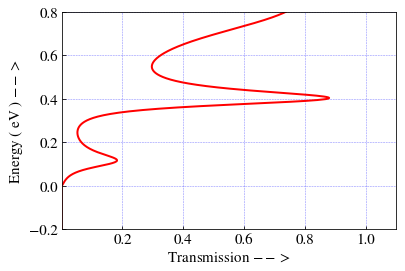

In [182]:
plot(TM,E,'r',lw=2)
xlabel(' Transmission $-->$ ',fontsize=15)
ylabel(' Energy ( eV ) $-->$ ',fontsize=15)
xlim(0,1.1)
ylim(-0.2,0.8)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.2,1.2,0.2))
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 9.5.8__ Effective transmission function for a resonant tunneling device including a Buttiker probe located at lattice site number 25 at the center of the device to simulate the effect of phase-breaking processes phenomenologically. </font>

***

In [183]:
%reset -f
%matplotlib inline
from pylab import *
import cmath

In [184]:
#Constants (all MKS, except energy which is in eV)
hbar=1.06e-34; q=1.6e-19; m=.25*9.1e-31; IE=(q*q)/(2*pi*hbar);
Ef=0.1; kT=.025;

#inputs
a=3e-10; t0=(hbar**2)/(2*m*(a**2)*q);

In [185]:
#Hamiltonian matrix
NS=15; NC=20; ND=15; Np=NS+NC+ND; UB=0*ones((Np,1)); #no barrier
T=(2*t0*diag(ones((Np))))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1));
T=T+diagflat(UB);

#Bias
NV=26; VV=linspace(0,0.5,NV);

#Initializing arrays
TM=zeros((101)); II=zeros((NV));

for iV in range (0,NV):
    V=VV[iV]; mu1=Ef+(V/2); mu2=Ef-(V/2);
    U1=V*hstack((0.5*ones((NS)),linspace(0.5,-0.5,NC),-0.5*ones((ND))));
    U1=transpose(U1); #Applied potential profile
    #Energy grid for Green’s function method
    NE=101; E=linspace(-0.2,0.8,NE); zplus=1j*1e-12; dE=E[1]-E[0];
    f1=1/(1+exp((E-mu1)/kT));
    f2=1/(1+exp((E-mu2)/kT));

    #Transmission
    I=0; #Current

    for k in range (0,NE):
        sig1=zeros((Np,Np),dtype=complex); sig2=zeros((Np,Np),dtype=complex); sig3=zeros((Np,Np),dtype=complex);
        ck=1-((E[k]+zplus-U1[0]-UB[0])/(2*t0)); ka=cmath.acos(ck);
        sig1[0,0]=-t0*exp(1j*ka); gam1=1j*(sig1-conj(transpose(sig1))); 
        ck=1-((E[k]+zplus-U1[Np-1]-UB[Np-1])/(2*t0)); ka=cmath.acos(ck);
        sig2[Np-1,Np-1]=-t0*exp(1j*ka); gam2=1j*(sig2-conj(transpose(sig2)));
        sig3[Np//2-1,Np//2-1]=-1j*0.00025;
        gam3=1j*(sig3-conj(transpose(sig3))); #B¨uttiker probe
        G=inv(((E[k]+zplus)*eye(Np))-T-diag(U1)-sig1-sig2-sig3);
        T12=real(trace(dot(dot(dot(gam1,G),gam2),conj(transpose(G)))));
        T13=real(trace(dot(dot(dot(gam1,G),gam3),conj(transpose(G)))));
        T23=real(trace(dot(dot(dot(gam2,G),gam3),conj(transpose(G)))));
        TM[k]=T12+(T13*T23/(T12+T23));
        I=I+(dE*IE*TM[k]*(f1[k]-f2[k]));   
    
    II[iV]=I; 

XX=a*1e9*array(list(range(1,Np+1)));
XS=XX[0:NS-4]; XD=XX[NS+NC+5-1:Np];

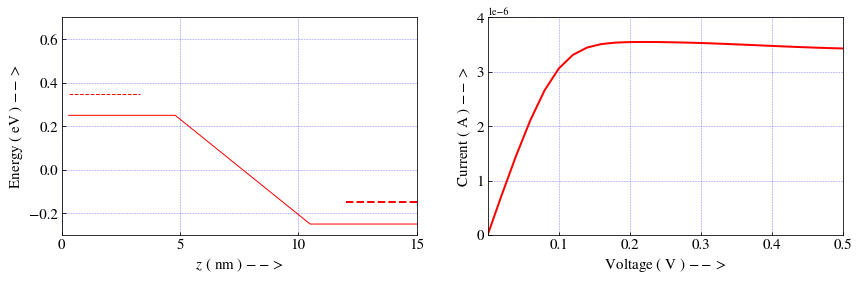

In [186]:
figure(figsize=(14,4))
subplot(1,2,1)
plot(XX,transpose(U1+transpose(UB)),'r',lw=1)
plot(XS,mu1*ones((NS-4)),'r--',lw=1)
plot(XD,mu2*ones((ND-4)),'r--',lw=2)
xlabel(' $z$ ( nm ) $-->$ ',fontsize=15)
ylabel(' Energy ( eV ) $-->$ ',fontsize=15)
xlim(0,15); 
ylim(-0.3,0.7)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0,20,5))
grid(color='b', alpha=0.5, ls='--',lw=0.5)

subplot(1,2,2)
plot(VV,II,'r',lw=2)
xlabel(' Voltage ( V ) $-->$ ',fontsize=15)
ylabel(' Current ( A ) $-->$ ',fontsize=15)
xlim(0,0.5)
ylim(0,4e-6)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.1,0.6,0.1))
ticklabel_format(axis='y', style='sci', scilimits=(0,0))
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > (a) Ballistic device </font>

In [187]:
#Hamiltonian matrix
NS=23; NC=4; ND=23; Np=NS+NC+ND;
UB=vstack((zeros((NS,1)),0.4*ones((NC,1)),zeros((ND,1)))); #tunneling barrier
T=(2*t0*diag(ones((Np))))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1));
T=T+diagflat(UB);

#Bias
NV=26; VV=linspace(0,0.5,NV);

#Initializing arrays
TM=zeros((101)); II=zeros((NV));

for iV in range (0,NV):
    V=VV[iV]; mu1=Ef+(V/2); mu2=Ef-(V/2);
    U1=V*hstack((0.5*ones((NS)),linspace(0.5,-0.5,NC),-0.5*ones((ND))));
    U1=transpose(U1); #Applied potential profile
    #Energy grid for Green’s function method
    NE=101; E=linspace(-0.2,0.8,NE); zplus=1j*1e-12; dE=E[1]-E[0];
    f1=1/(1+exp((E-mu1)/kT));
    f2=1/(1+exp((E-mu2)/kT));

    #Transmission
    I=0; #Current

    for k in range (0,NE):
        sig1=zeros((Np,Np),dtype=complex); sig2=zeros((Np,Np),dtype=complex); sig3=zeros((Np,Np),dtype=complex);
        ck=1-((E[k]+zplus-U1[0]-UB[0])/(2*t0)); ka=cmath.acos(ck);
        sig1[0,0]=-t0*exp(1j*ka); gam1=1j*(sig1-conj(transpose(sig1))); 
        ck=1-((E[k]+zplus-U1[Np-1]-UB[Np-1])/(2*t0)); ka=cmath.acos(ck);
        sig2[Np-1,Np-1]=-t0*exp(1j*ka); gam2=1j*(sig2-conj(transpose(sig2)));
        sig3[Np//2-1,Np//2-1]=-1j*0.00025;
        gam3=1j*(sig3-conj(transpose(sig3))); #B¨uttiker probe
        G=inv(((E[k]+zplus)*eye(Np))-T-diag(U1)-sig1-sig2-sig3);
        T12=real(trace(dot(dot(dot(gam1,G),gam2),conj(transpose(G)))));
        T13=real(trace(dot(dot(dot(gam1,G),gam3),conj(transpose(G)))));
        T23=real(trace(dot(dot(dot(gam2,G),gam3),conj(transpose(G)))));
        TM[k]=T12+(T13*T23/(T12+T23));
        I=I+(dE*IE*TM[k]*(f1[k]-f2[k]));   
    
    II[iV]=I; 

XX=a*1e9*array(list(range(1,Np+1)));
XS=XX[0:NS-4]; XD=XX[NS+NC+5-1:Np];

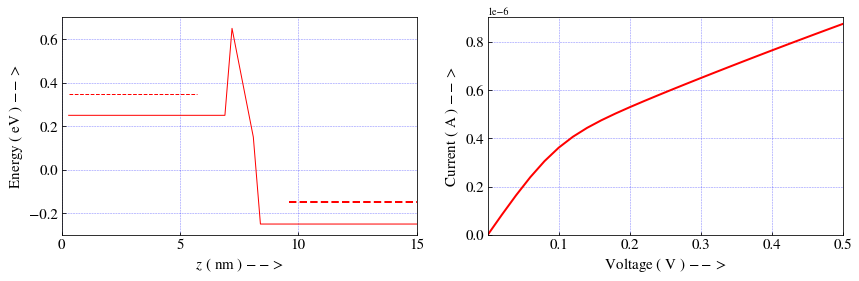

In [188]:
figure(figsize=(14,4))
subplot(1,2,1)
plot(XX,transpose(U1+transpose(UB)),'r',lw=1)
plot(XS,mu1*ones((NS-4)),'r--',lw=1)
plot(XD,mu2*ones((ND-4)),'r--',lw=2)
xlabel(' $z$ ( nm ) $-->$ ',fontsize=15)
ylabel(' Energy ( eV ) $-->$ ',fontsize=15)
xlim(0,15); 
ylim(-0.3,0.7)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0,20,5))
grid(color='b', alpha=0.5, ls='--',lw=0.5)

subplot(1,2,2)
plot(VV,II,'r',lw=2)
xlabel(' Voltage ( V ) $-->$ ',fontsize=15)
ylabel(' Current ( A ) $-->$ ',fontsize=15)
xlim(0,0.5)
ylim(0,9e-7)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.1,0.6,0.1))
ticklabel_format(axis='y', style='sci', scilimits=(0,0))
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > (b) Tunneling device </font>

In [189]:
#Hamiltonian matrix
NS=15; NC=16; ND=15; Np=NS+NC+ND;
UB=vstack((zeros((NS,1)),0.4*ones((4,1)),zeros((NC-8,1)),0.4*ones((4,1)),zeros((ND,1)))); #RT barrier
T=(2*t0*diag(ones((Np))))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1));
T=T+diagflat(UB);

#Bias
NV=26; VV=linspace(0,0.5,NV);

#Initializing arrays
TM=zeros((101)); II=zeros((NV));

for iV in range (0,NV):
    V=VV[iV]; mu1=Ef+(V/2); mu2=Ef-(V/2);
    U1=V*hstack((0.5*ones((NS)),linspace(0.5,-0.5,NC),-0.5*ones((ND))));
    U1=transpose(U1); #Applied potential profile
    #Energy grid for Green’s function method
    NE=101; E=linspace(-0.2,0.8,NE); zplus=1j*1e-12; dE=E[1]-E[0];
    f1=1/(1+exp((E-mu1)/kT));
    f2=1/(1+exp((E-mu2)/kT));
    
    #Transmission
    I=0; #Current

    for k in range (0,NE):
        sig1=zeros((Np,Np),dtype=complex); sig2=zeros((Np,Np),dtype=complex); sig3=zeros((Np,Np),dtype=complex);
        ck=1-((E[k]+zplus-U1[0]-UB[0])/(2*t0)); ka=cmath.acos(ck);
        sig1[0,0]=-t0*exp(1j*ka); gam1=1j*(sig1-conj(transpose(sig1))); 
        ck=1-((E[k]+zplus-U1[Np-1]-UB[Np-1])/(2*t0)); ka=cmath.acos(ck);
        sig2[Np-1,Np-1]=-t0*exp(1j*ka); gam2=1j*(sig2-conj(transpose(sig2)));
        sig3[Np//2-1,Np//2-1]=-1j*0.00025;
        gam3=1j*(sig3-conj(transpose(sig3))); #B¨uttiker probe
        G=inv(((E[k]+zplus)*eye(Np))-T-diag(U1)-sig1-sig2-sig3);
        T12=real(trace(dot(dot(dot(gam1,G),gam2),conj(transpose(G)))));
        T13=real(trace(dot(dot(dot(gam1,G),gam3),conj(transpose(G)))));
        T23=real(trace(dot(dot(dot(gam2,G),gam3),conj(transpose(G)))));
        TM[k]=T12+(T13*T23/(T12+T23));
        I=I+(dE*IE*TM[k]*(f1[k]-f2[k]));   
    
    II[iV]=I; 

XX=a*1e9*array(list(range(1,Np+1)));
XS=XX[0:NS-4]; XD=XX[NS+NC+5-1:Np];

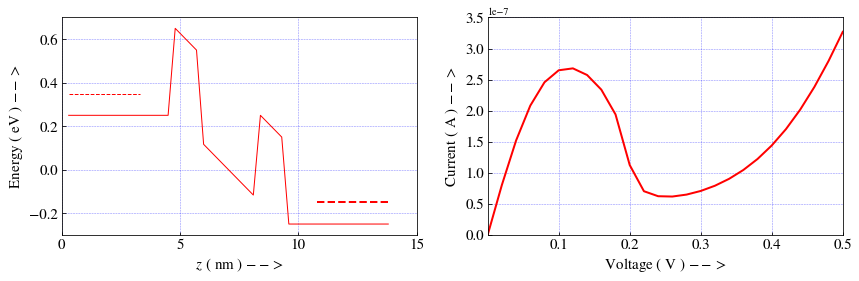

In [190]:
figure(figsize=(14,4))
subplot(1,2,1)
plot(XX,transpose(U1+transpose(UB)),'r',lw=1)
plot(XS,mu1*ones((NS-4)),'r--',lw=1)
plot(XD,mu2*ones((ND-4)),'r--',lw=2)
xlabel(' $z$ ( nm ) $-->$ ',fontsize=15)
ylabel(' Energy ( eV ) $-->$ ',fontsize=15)
xlim(0,15); 
ylim(-0.3,0.7)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0,20,5))
grid(color='b', alpha=0.5, ls='--',lw=0.5)

subplot(1,2,2)
plot(VV,II,'r',lw=2)
xlabel(' Voltage ( V ) $-->$ ',fontsize=15)
ylabel(' Current ( A ) $-->$ ',fontsize=15)
xlim(0,0.5)
ylim(0,3.5e-7)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.1,0.6,0.1))
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > (c) Resonant tunneling device </font>

<font color = "stone"><font size = "4" > __Fig. 9.5.10__ Current $(I)$ versus voltage $(V)$ characteristics of the three devices shown in Fig. 9.5.4 calculated assuming the linear potential profile shown. The left-hand plots show the assumed band diagrams at a bias of 0.5 V. </font>

***

## _References_ </u><a id="references"></a>

<font color = "stone"><font size = "3" > 
- Datta, S. (2005). Quantum Transport: Atom to Transistor. Cambridge: Cambridge University Press. doi:10.1017/CBO9781139164313 
- Datta, S. “Fundamentals of Nanoelectronics: Basic Concepts”. MOOC offered by the Purdue University. <br>
[Online] https://courses.edx.org/courses/PurdueX/nano520/3T2015/course/
- Datta, S. “Fundamentals of Nanoelectronics, Part B: Quantum Transport”. MOOC offered by the Purdue University. <br> 
[Online] https://courses.edx.org/courses/course-v1:PurdueX+nano521x+2015_T3/course/</font>